In [1]:
#Install the necessary libraries

import numpy as np 
import pandas as pd
import seaborn as sns
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#!pip install category_encoders
#!pip install imblearn
#!pip install graphviz

In [3]:
# import encoders
import category_encoders as category_encoder

In [4]:
# Scalers
from sklearn.preprocessing import MinMaxScaler

In [5]:
from pathlib import Path
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [6]:
import graphviz 

In [7]:
# import training data
data_train = pd.read_csv("train_PDjVQMB.csv")

In [8]:
data_train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [9]:
data_train.tail()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
6645,a8216afd,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor,1
6646,153a306b,42,Female,5L - 10L,596286.54,3,1,2,1,Average,0
6647,d4075a95,29,Male,Less than 5L,979298.19,2,0,2,0,Poor,0
6648,5855b142,66,Female,10L - 15L,395233.65,3,0,2,1,Poor,1
6649,57b39511,37,Male,More than 15L,826947.27,1,1,2,0,Good,0


In [10]:
data_train['Is_Churn'].unique()

array([1, 0], dtype=int64)

In [11]:
data_train['Is_Churn'].value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

# As we have only two classes. We need to build binary classification Model.

In [12]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


# Given dataset does not contain Missing Values. 

# Let us first identify types of data gievn to us.

Let's identify data types
- Age                 => Numeric (Discrete)  
- Gender              => Categorical (Nominal)
- Income              => Categorical (Ordinal)
- Balance             => Numeric (Contineous)
- Vintage             => Numeric (Discrete)
- Transaction_Status  => Categorical (Nominal)
- Product_Holdings    => Numeric (Discrete) 
- Credit_Card         => Categorical (Nominal)
- Credit_Category     => Categorical (Ordinal)

# Box Plot for Non-Categorical variables

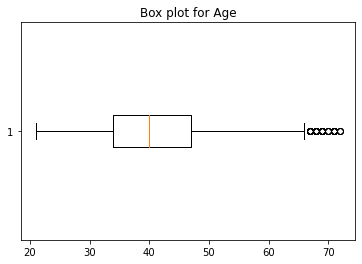

In [13]:
# Box Plot for Age
fig1, ax1 = plt.subplots()
ax1.set_title('Box plot for Age')
ax1.boxplot(data_train['Age'], vert=False)
plt.show()

Age contains outliers

In [14]:
# handling outlier for 'Age' feature
age_q3 = data_train["Age"].quantile(0.75)
age_q1 = data_train["Age"].quantile(0.25)
# find out iqr for 'Age' feature
age_iqr = age_q3 - age_q1
print("age iqr:", age_iqr)
age_upper_cutoff = age_q3 + 1.5*age_iqr
age_lower_cutoff = age_q1 - 1.5*age_iqr
print("Age upper cutoff:", age_upper_cutoff)
print("Age lower cutoff:", age_lower_cutoff)

#capping outlier at upper cutoff for 'Age' feature
#print(data_train[data_train.Age > age_upper_cutoff])

data_train.drop(data_train[data_train.Age > age_upper_cutoff].index, inplace=True)

print(len(data_train))

age iqr: 13.0
Age upper cutoff: 66.5
Age lower cutoff: 14.5
6593


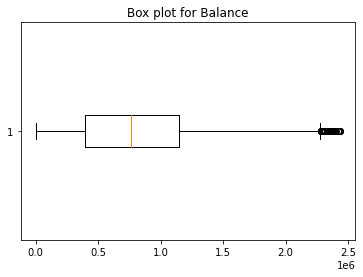

In [15]:
# Box Plot for 'Balance'
fig2, ax2 = plt.subplots()
ax2.set_title('Box plot for Balance')
ax2.boxplot(data_train['Balance'], vert=False)
plt.show()

Balance contains outliers

In [16]:
# handling outlier for 'Balance' feature
balance_q3 = data_train["Balance"].quantile(0.75)
balance_q1 = data_train["Balance"].quantile(0.25)

print(balance_q1)
print(balance_q3)
# find out iqr for 'Balance' feature
balance_iqr = balance_q3 - balance_q1
print("Balance iqr:", balance_iqr)
balance_upper_cutoff = balance_q3 + 1.5*balance_iqr
balance_lower_cutoff = balance_q1 - 1.5*balance_iqr
print("Balance upper cutoff:", balance_upper_cutoff)
print("Balance lower cutoff:", balance_lower_cutoff)

#capping outlier at upper cutoff for 'Age' feature
#print(data[data.Balance > balance_upper_cutoff])

data_train.drop(data_train[data_train.Balance > balance_upper_cutoff].index, inplace=True)

print(len(data_train))

391936.59
1146220.74
Balance iqr: 754284.1499999999
Balance upper cutoff: 2277646.965
Balance lower cutoff: -739489.6349999998
6555


In [17]:
# Check 5 point summary of different features.
data_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,6555.0,40.878719,9.370421,21.0,34.000,40.00,47.000,66.00
Balance,6555.0,795535.072270,504120.213882,63.0,389898.855,761372.91,1138607.685,2277045.18
Vintage,6555.0,2.250496,1.460009,0.0,1.000,2.00,3.000,5.00
Transaction_Status,6555.0,0.514874,0.499817,0.0,0.000,1.00,1.000,1.00
Credit_Card,6555.0,0.665294,0.471924,0.0,0.000,1.00,1.000,1.00
Is_Churn,6555.0,0.228070,0.419620,0.0,0.000,0.00,0.000,1.00


 - For Age, Mean and Median are very close to each other.
 - For Balance, Mean and Median are very far away from each other.

# Analysis of Categorical Variables 

We have below columns as Categorical (Ordinal)
 - Income
 - Credit_Category

First, need to convert ordinal values i.e. Income and Credit_Category

In [18]:
def encode_column_income(data) :
    ordinal_encoder = category_encoder.OrdinalEncoder(cols=['Income'], return_df=True,
                                                  mapping=[{'col':'Income',
                                                            'mapping':{'Less than 5L':0,'5L - 10L':1,'10L - 15L':2,'More than 15L':3}}])
    data_encoded = ordinal_encoder.fit_transform(data)
    return data_encoded

In [19]:
def encode_column_credit_category(data) :
    ordinal_encoder = category_encoder.OrdinalEncoder(cols=['Credit_Category'], return_df=True,
                                                      mapping=[{'col':'Credit_Category',
                                                                'mapping':{'Poor':0,'Average':1,'Good':2}}])
    data_encoded = ordinal_encoder.fit_transform(data)
    return data_encoded

We have below columns as Categorical (Nominal)
 - Gender
 - Transaction_Status
 - Credit_Card
However, we need to convert only 'Gender' to numerical format.
'Transaction_Status' and 'Credit_Card' are in Numeric format itself.

In [20]:
def encode_column_gender(data) :
    one_hot_encoder = category_encoder.OneHotEncoder(cols=['Gender'])
    data_encoded = one_hot_encoder.fit_transform(data)
    return data_encoded

In 'Product_Holdings' column, will replace value '3+' with '3'.

In [21]:
def update_column_product_holdings(data) :
    data_encoded = data.replace('3+', '3')
    data_encoded['Product_Holdings'] = data_encoded.Product_Holdings.astype('int64')
    return data_encoded

# Applying Standard Scaling to the columns Age and Balance

In [22]:
min_max_scaler = MinMaxScaler()

In [23]:
# Standardization
def apply_standard_scaling(data) :
    data[['Age', 'Balance']]  = min_max_scaler.fit_transform(data[['Age', 'Balance']])
    return data

In [24]:
def pre_process_data(data) :
    data = data.drop(['ID'], axis=1)
    data = encode_column_income(data)
    data = encode_column_credit_category(data)
    data = encode_column_gender(data)
    data = update_column_product_holdings(data)
    #data = apply_standard_scaling(data)
    return data

In [25]:
data_encoded = pre_process_data(data_train)

In [26]:
data_encoded.head(10)

,Age,Gender_1,Gender_2,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,1,0,1,563266.44,4,0,1,0,1,1
1,53,1,0,0,875572.11,2,1,1,1,0,0
2,35,1,0,3,701607.06,2,1,2,0,0,0
3,43,1,0,3,1393922.16,0,1,2,1,0,1
4,39,1,0,3,893146.23,1,1,1,1,2,1
5,31,1,0,0,111026.79,4,1,1,0,2,0
6,56,0,1,0,1072102.23,2,1,2,1,1,0
7,41,1,0,2,1587489.75,4,0,1,1,0,1
8,60,1,0,2,1465812.54,0,0,1,1,0,1
9,32,1,0,1,770796.81,3,0,1,1,0,0


In [27]:
# Check Correlation between different features.
data_encoded.corr()

,Age,Gender_1,Gender_2,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
Age,1.000000,-0.004752,0.004752,0.017525,-0.002602,0.020567,0.028256,-0.026254,0.012108,-0.010807,0.197603
Gender_1,-0.004752,1.000000,-1.000000,0.022744,-0.015217,-0.000207,-0.011392,0.022696,0.008079,-0.000124,0.054186
Gender_2,0.004752,-1.000000,1.000000,-0.022744,0.015217,0.000207,0.011392,-0.022696,-0.008079,0.000124,-0.054186
Income,0.017525,0.022744,-0.022744,1.000000,0.034283,0.006167,0.017616,0.012701,0.010286,0.019802,0.019094
Balance,-0.002602,-0.015217,0.015217,0.034283,1.000000,-0.022399,-0.005384,-0.250780,-0.017751,-0.012958,0.050846
Vintage,0.020567,-0.000207,0.000207,0.006167,-0.022399,1.000000,-0.028315,0.016347,0.003009,0.012382,0.020549
Transaction_Status,0.028256,-0.011392,0.011392,0.017616,-0.005384,-0.028315,1.000000,0.003085,0.006232,0.027402,-0.085652
Product_Holdings,-0.026254,0.022696,-0.022696,0.012701,-0.250780,0.016347,0.003085,1.000000,0.017183,0.003283,-0.029301
Credit_Card,0.012108,0.008079,-0.008079,0.010286,-0.017751,0.003009,0.006232,0.017183,1.000000,0.007370,-0.000473
Credit_Category,-0.010807,-0.000124,0.000124,0.019802,-0.012958,0.012382,0.027402,0.003283,0.007370,1.000000,-0.037553


According to the values received above, no two features have strong correlationship with each other. 

 - Age has positive co-relation with Attrition. 
 - Transaction_Status has negative co-relation with Attrition.
 - Balance has positive co-relation with Attrition.

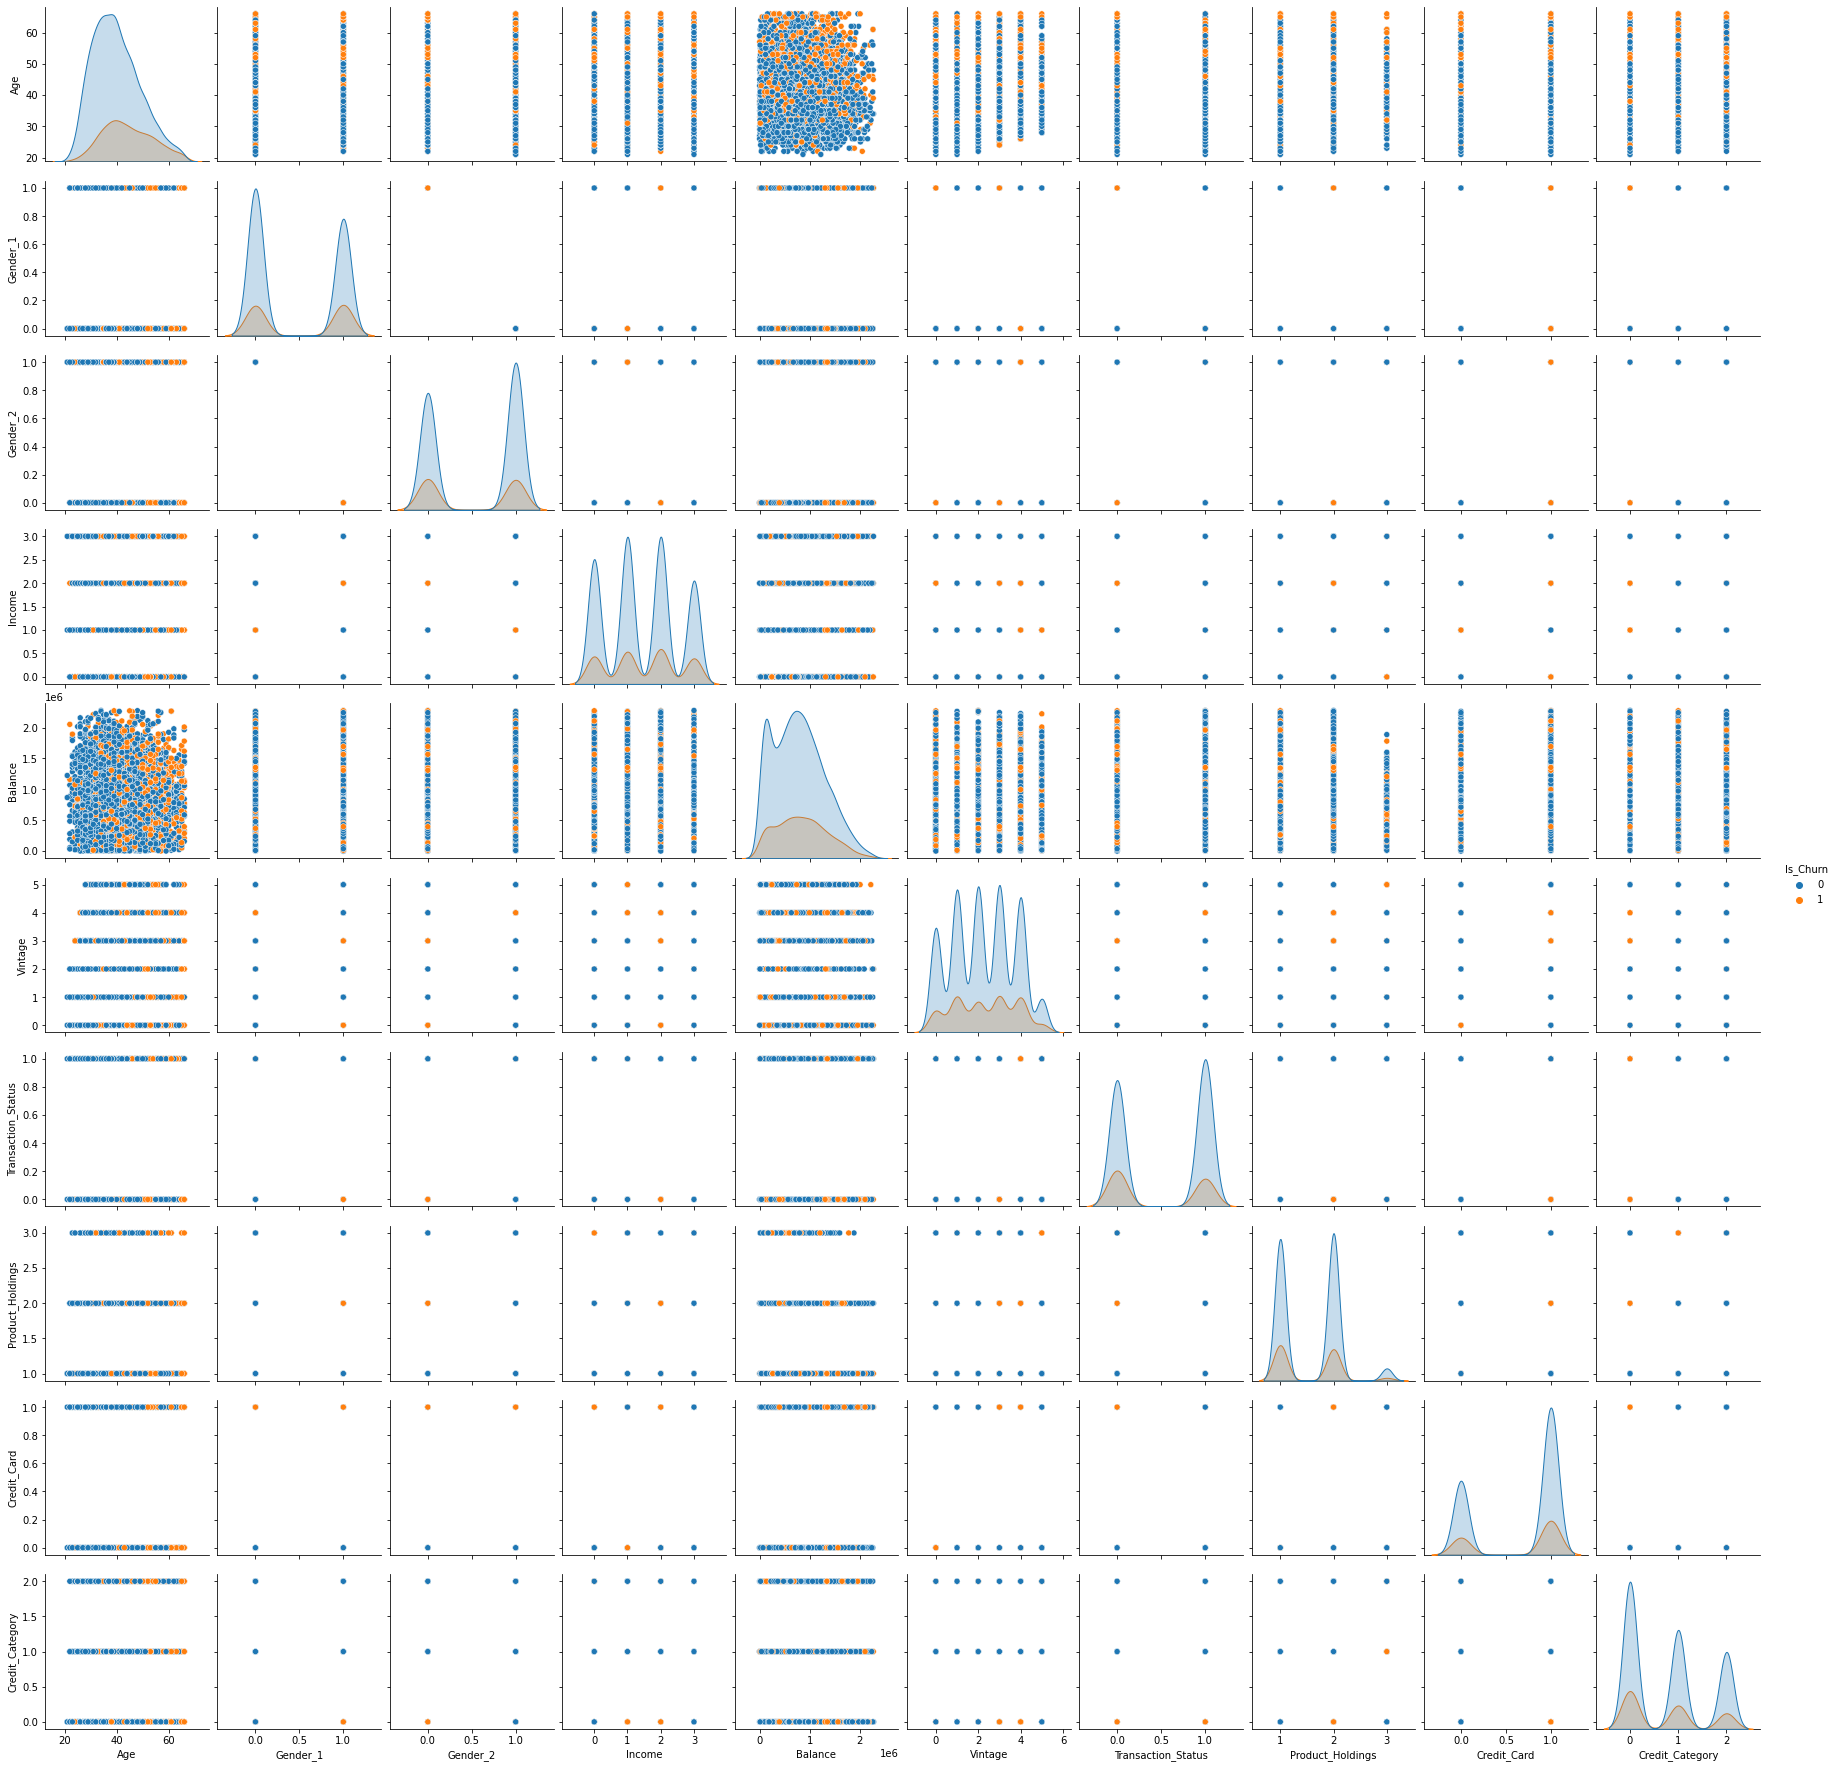

In [28]:
# Let's Check Pairplots
sns.pairplot(data_encoded, hue='Is_Churn')
plt.show()

There is good overlap between two classes which we want to identify. Ideally, no overlap / minimum overlap is expected for overlapping.

# Separate Label and features

In [29]:
X_train = data_encoded.drop(['Is_Churn'], axis=1)
y_train = data_encoded['Is_Churn']

In [30]:
X_train.head()

,Age,Gender_1,Gender_2,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,36,1,0,1,563266.44,4,0,1,0,1
1,53,1,0,0,875572.11,2,1,1,1,0
2,35,1,0,3,701607.06,2,1,2,0,0
3,43,1,0,3,1393922.16,0,1,2,1,0
4,39,1,0,3,893146.23,1,1,1,1,2


In [31]:
y_train.head()

0    1
1    0
2    0
3    1
4    1
Name: Is_Churn, dtype: int64

# Handle Imbalance in the Data

In [32]:
data_encoded['Is_Churn'].value_counts()

0    5060
1    1495
Name: Is_Churn, dtype: int64

As we can see from the above counts, our data is imbalanced. 
The aprox. ratio of majority class to minority class is 3.3 : 1

In [33]:
smote = SMOTE()

# fit predictor and target variable
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [34]:
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_smote))

Original dataset shape Counter({0: 5060, 1: 1495})
Resample dataset shape Counter({1: 5060, 0: 5060})


Now, we have same number of records for both classes.

# Decision Tree Classifier

In [35]:
from sklearn import tree

In [36]:
tree_model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=7, random_state = 42)

In [37]:
tree_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)

In [38]:
y_train_pred = tree_model.predict(X_train_smote)

In [39]:
# Traning Accuracy
tree_model.score(X_train_smote, y_train_smote)

0.7502964426877471

In [40]:
cnf_matrix = metrics.confusion_matrix(y_train_smote, y_train_pred)
cnf_matrix

array([[3701, 1359],
       [1168, 3892]], dtype=int64)

In [41]:
imp_features = tree_model.feature_importances_
imp_features

array([0.17624055, 0.37649732, 0.11165002, 0.00916323, 0.05029253,
       0.00968733, 0.16823032, 0.03401196, 0.01843416, 0.0457926 ])

In [42]:
imp_features.sort()
imp_features

array([0.00916323, 0.00968733, 0.01843416, 0.03401196, 0.0457926 ,
       0.05029253, 0.11165002, 0.16823032, 0.17624055, 0.37649732])

# Remove unnecessary Features

In [43]:
X_train_smote.head()

,Age,Gender_1,Gender_2,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,36,1,0,1,563266.44,4,0,1,0,1
1,53,1,0,0,875572.11,2,1,1,1,0
2,35,1,0,3,701607.06,2,1,2,0,0
3,43,1,0,3,1393922.16,0,1,2,1,0
4,39,1,0,3,893146.23,1,1,1,1,2


In [44]:
X_train_smote.drop(['Income', 'Vintage', 'Credit_Card', 'Product_Holdings'], axis=1, inplace=True)

In [45]:
X_train_smote.head()

,Age,Gender_1,Gender_2,Balance,Transaction_Status,Credit_Category
0,36,1,0,563266.44,0,1
1,53,1,0,875572.11,1,0
2,35,1,0,701607.06,1,0
3,43,1,0,1393922.16,1,0
4,39,1,0,893146.23,1,2


# Build A New Model on Training Data

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [47]:
def pre_process_data_for_new_model(data) :
    data = apply_standard_scaling(data)
    return data

In [48]:
X_train_smote = pre_process_data_for_new_model(X_train_smote)

In [49]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [50]:
logistic_reg_model = LogisticRegression(random_state=17)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
#penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.05, 0.01]
# define grid search
grid = dict(solver=solvers, C=c_values)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
grid_search = GridSearchCV(estimator=logistic_reg_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_score', error_score=0)
grid_result = grid_search.fit(X_train_smote, y_train_smote)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.814174 using {'C': 100, 'solver': 'lbfgs'}


In [51]:
# logistic_reg_model = LogisticRegression(random_state=17)
# Best: 0.809037 using {'C': 10, 'solver': 'liblinear'}   => test accuracy = 0.608378275252564

# logistic_reg_model = LogisticRegression(random_state=7)
# Best: 0.814947 using {'C': 10, 'solver': 'liblinear'}



In [52]:
y_train_pred = grid_search.predict(X_train_smote)

In [53]:
# Traning Accuracy
grid_search.score(X_train_smote, y_train_smote)

0.8145616632036121

In [54]:
cnf_matrix = metrics.confusion_matrix(y_train_smote, y_train_pred)
cnf_matrix

array([[4156,  904],
       [1818, 3242]], dtype=int64)

# Predict for Test Data

In [55]:
# import test data
data_test = pd.read_csv("test_lTY72QC.csv")

In [56]:
# pre-process test data as well
data_test_encoded = pre_process_data(data_test)
data_test_encoded.head()

,Age,Gender_1,Gender_2,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,50,1,0,3,1008636.39,2,1,2,1,1
1,36,0,1,1,341460.72,2,0,2,1,1
2,25,1,0,2,439460.10,0,0,2,1,2
3,41,0,1,0,28581.93,0,1,2,1,0
4,48,0,1,3,1104540.03,2,1,3,0,2


In [57]:
X_test = data_test_encoded
X_test.drop(['Income', 'Vintage', 'Credit_Card', 'Product_Holdings'], axis=1, inplace=True)
X_test = pre_process_data_for_new_model(X_test)

In [58]:
y_test_pred = grid_search.predict(X_test)

In [59]:
y_test_pred[0:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [60]:
test_data_df = pd.DataFrame(data=data_test['ID'])
test_data_df.head()

,ID
0,55480787
1,9aededf2
2,a5034a09
3,b3256702
4,dc28adb5


In [61]:
test_data_df.insert(loc=1, column="Is_Churn", value=y_test_pred)

In [62]:
test_data_df.head(10)

,ID,Is_Churn
0,55480787,0
1,9aededf2,0
2,a5034a09,0
3,b3256702,0
4,dc28adb5,0
5,5aee459a,0
6,3e83f7ea,1
7,ed4dfbd0,0
8,3911bea6,1
9,e04eff55,0


In [63]:
filepath = Path('C://Users/Arati Satpute/AI_ML_Programs/Job-A-Thon_AnalyticsVidya/DecisionTree/out.csv') 
filepath.parent.mkdir(parents=True, exist_ok=True)
test_data_df.to_csv(filepath, index=False)